In [58]:
import itertools

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shapereader
import matplotlib.pyplot as plt
from matplotlib import colors

In [8]:
shpfilename = shapereader.natural_earth(
    resolution="10m", category="cultural", name="admin_0_countries"
)

In [53]:
cmap = plt.get_cmap("Reds")

In [11]:
plt.figure(figsize=[5,5])

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [13]:
provinces_of_japan = filter(lambda province: province.attributes['admin'] == 'Japan', provinces)

In [46]:
data = {
    "United Kingdom": 13,
    "United States of America": 14,
    "Japan": 1,
    "Canada": 4,
    "Germany": 1,
}

In [67]:
norm = colors.Normalize(vmin=0, vmax=14)

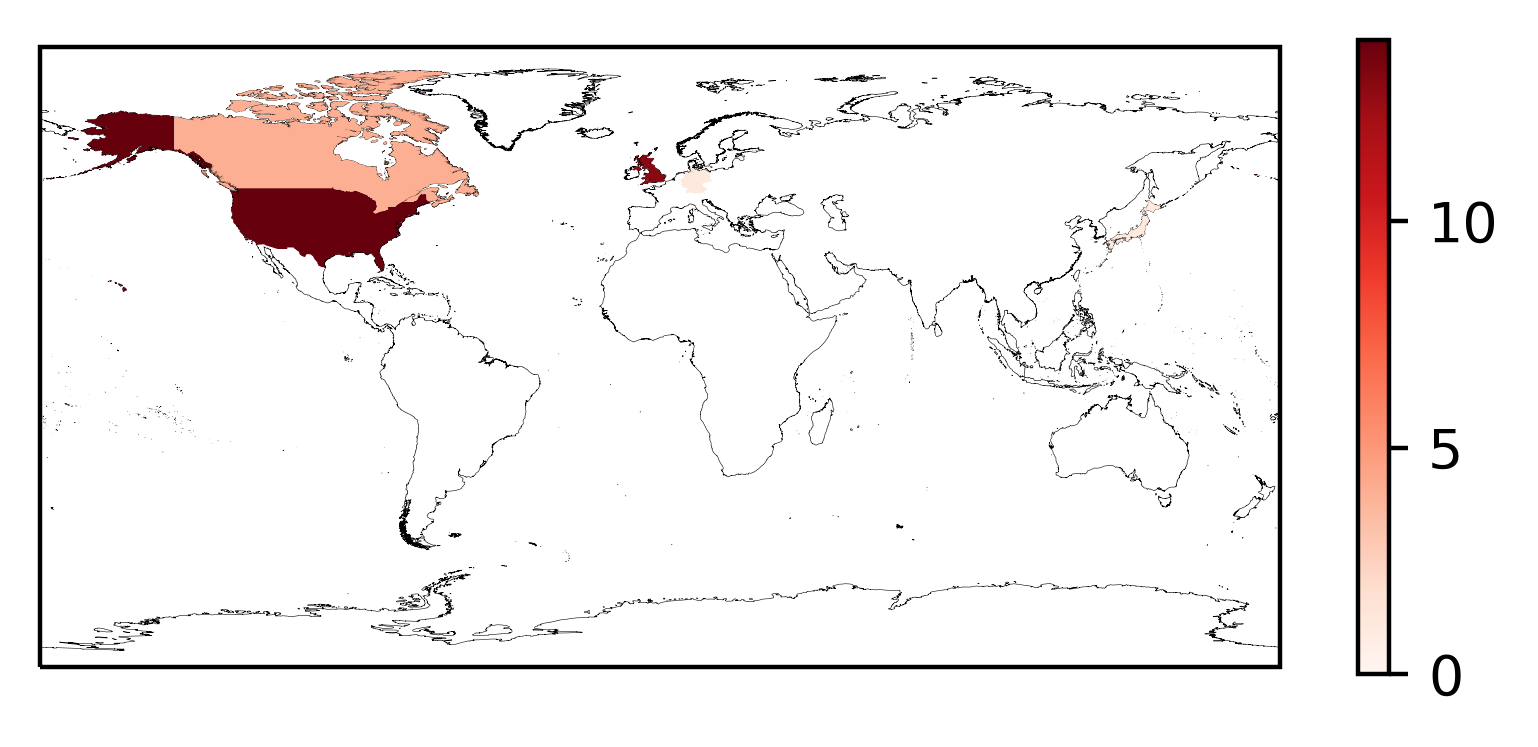

In [89]:
plt.figure(figsize=[5,5], dpi=400)
ax1 = plt.axes(projection=ccrs.PlateCarree())
ax1.coastlines(resolution='10m', linewidth=0.1)

reader = shapereader.Reader(shpfilename)
provinces = reader.records()
for province in provinces:
    for key, value in data.items():
        if key == province.attributes["NAME_EN"]:
            geometry = province.geometry
            ax1.add_geometries(geometry, ccrs.PlateCarree(), color=cmap(norm(value)), linewidth=0)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = plt.colorbar(sm, shrink=0.42)
# cb.set_ticks([])

plt.show()